
# 2022빅콘테스트_데이터분석리그_데이터분석분야_루키부문_데이터셋_220908

***
# 문제

### 제주도 내국인 관광객 입도객 수 예측
1. 제주도 내국인 입도객 중 관광 목적의 입도객 예측
1. 관광 관련 다양한 이슈를 고려하여 분석 수행
***

1. base_month : 기준년월
1. leis_spors_cnt : 레저스포츠
1. ref_view_cnt : 휴양 및 관람
1. meet_work_cnt : 회의 및 업무
1. visit_rel_cnt : 친지방문
1. edu_trip_cnt : 교육여행
1. etc_cnt : 기타방문
1. total_visit_cnt : 총 입도객수

## 모듈 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # Windows
matplotlib.rcParams['font.size'] = 15  # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False  # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

### 데이터(.csv) 읽기

In [2]:
df = pd.read_csv('2022빅콘테스트_데이터분석리그_데이터분석분야_루키부문_데이터셋_220908.csv')
df.head()

,base_month,leis_sports_cnt,ref_view_cnt,meet_work_cnt,visit_rel_cnt,edu_trip_cnt,etc_cnt,total_visit_cnt
0,201501,127063,521304,75791,55457,3621,9432,792668
1,201502,134718,459032,72552,43058,202,12025,721587
2,201503,143528,490004,78294,44581,20466,14841,791714
3,201504,146259,623087,83467,27927,44893,13662,939295
4,201505,179944,628479,87166,29779,71746,18225,1015339


### 관광
1. 나라의 성덕(盛德)과 광휘(光輝)를 봄.
1. 다른 지방이나 다른 나라에 가서 그곳의 풍경, 풍습, 문물 따위를 구경함.

즉, 레저스포츠, 휴양 및 관람, 교육여행 등이 관광에 해당한다.

tour_cnt = 제주도 내국인 관광객 입도객 수

In [3]:
df['tour_cnt'] = df['leis_sports_cnt'] + df['ref_view_cnt'] + df['edu_trip_cnt']
df.head()

,base_month,leis_sports_cnt,ref_view_cnt,meet_work_cnt,visit_rel_cnt,edu_trip_cnt,etc_cnt,total_visit_cnt,tour_cnt
0,201501,127063,521304,75791,55457,3621,9432,792668,651988
1,201502,134718,459032,72552,43058,202,12025,721587,593952
2,201503,143528,490004,78294,44581,20466,14841,791714,653998
3,201504,146259,623087,83467,27927,44893,13662,939295,814239
4,201505,179944,628479,87166,29779,71746,18225,1015339,880169


### base_month 년과 월로 구분하기

In [4]:
df['base_year'] = df['base_month'].astype(str).str[0:4]
df['base_month'] = df['base_month'].astype(str).str[4:]
df

,base_month,leis_sports_cnt,ref_view_cnt,meet_work_cnt,visit_rel_cnt,edu_trip_cnt,etc_cnt,total_visit_cnt,tour_cnt,base_year
0,01,127063,521304,75791,55457,3621,9432,792668,651988,2015
1,02,134718,459032,72552,43058,202,12025,721587,593952,2015
2,03,143528,490004,78294,44581,20466,14841,791714,653998,2015
3,04,146259,623087,83467,27927,44893,13662,939295,814239,2015
4,05,179944,628479,87166,29779,71746,18225,1015339,880169,2015
...,...,...,...,...,...,...,...,...,...,...
86,03,74732,617995,54215,98248,0,24638,869828,692727,2022
87,04,102377,843283,99160,97450,761,31738,1174769,946421,2022
88,05,94892,918511,127819,121753,5588,33400,1301963,1018991,2022
89,06,106281,970029,81591,99722,5233,14992,1277848,1081543,2022


In [5]:
df_group = df.groupby('base_year').mean()
df_group

,leis_sports_cnt,ref_view_cnt,meet_work_cnt,visit_rel_cnt,edu_trip_cnt,etc_cnt,total_visit_cnt,tour_cnt
base_year,,,,,,,,
2015,123865.583333,621546.166667,93962.500000,40952.000000,21449.583333,18235.416667,9.200112e+05,766861.333333
2016,131626.416667,728283.916667,89390.833333,40786.250000,20242.916667,10499.583333,1.020830e+06,880153.250000
2017,127421.000000,830292.083333,91781.416667,47429.083333,20293.750000,9668.666667,1.126886e+06,978006.833333
2018,132593.083333,793110.333333,72200.833333,56707.750000,23467.166667,12681.583333,1.090761e+06,949170.583333
2019,132388.250000,836400.500000,63990.916667,61883.833333,23034.666667,12302.166667,1.130000e+06,991823.416667
2020,64289.166667,623484.750000,60423.750000,74743.500000,37.166667,12328.166667,8.353065e+05,687811.083333
2021,85145.000000,748128.416667,77878.000000,70352.916667,156.250000,15019.333333,9.966799e+05,833429.666667
2022,120202.857143,835396.285714,81236.571429,95728.571429,2250.000000,18687.000000,1.153501e+06,957849.142857


## 년도별 관광객 수

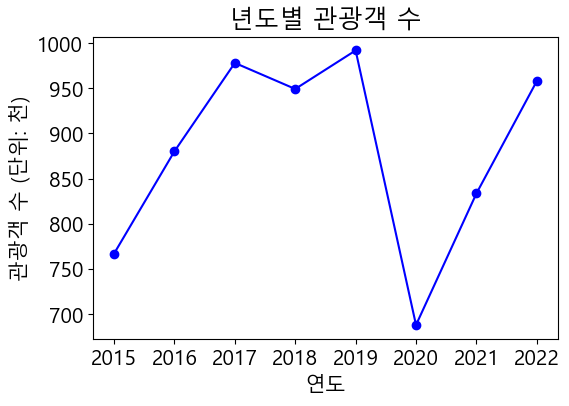

In [6]:
plt.figure(dpi=100)
plot = plt.plot(df_group.index, df_group['tour_cnt']/1000, marker='o', color='b')
plt.title('년도별 관광객 수')
plt.xlabel('연도')
plt.ylabel('관광객 수 (단위: 천)')
plt.show()

## 제주도 내국인 입도객 중 관광 목적의 입도객 예측
- 2015년도부터 점진적으로 증가했지만, Covid-19 유행으로 2020년도에 관광객 수가 최저점을 찍었다. 하지만 2021년부터 다시 관광객 수가 증가함에 따라 2023년도 증가할 것으로 보인다.
- 또한, 많은 관광객들이 휴양 및 관람을 목적으로 관광을 온다
- 20년도 이후로 Covid-19 유행때문에 교육여행이 줄어들었지만 다시 2023년부터 늘어날 것으로 보인다.
- 하지만, 저출산 영향으로 인해 교육여행을 오는 학생의 수는 예전만큼 많진 않을 것으로 예상된다.

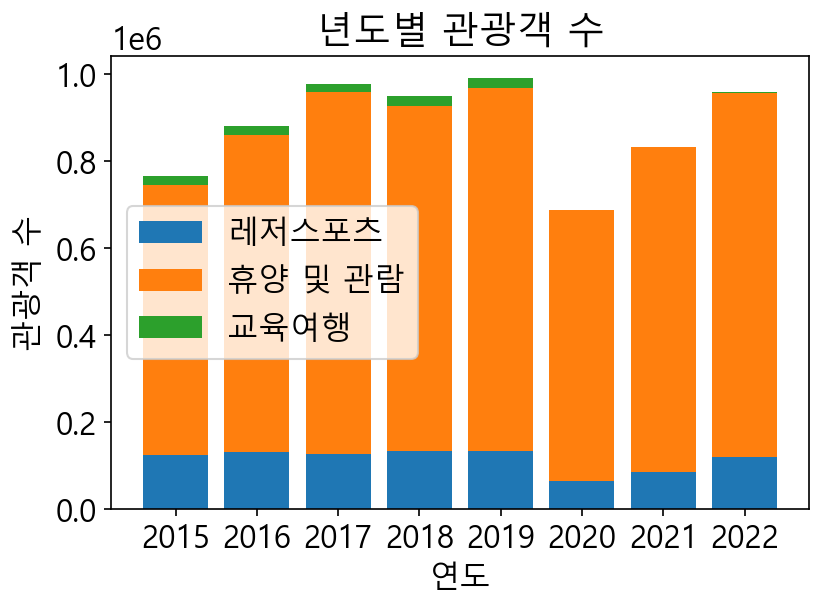

In [7]:
plt.figure(dpi=150)
bar = plt.bar(df_group.index, df_group['leis_sports_cnt'], label='레저스포츠')
bar = plt.bar(df_group.index, df_group['ref_view_cnt'], bottom=df_group['leis_sports_cnt'], label='휴양 및 관람')
bar = plt.bar(df_group.index, df_group['edu_trip_cnt'], bottom=df_group['leis_sports_cnt'] + df_group['ref_view_cnt'], label='교육여행')
plt.title('년도별 관광객 수')
plt.xlabel('연도')
plt.ylabel('관광객 수')
plt.legend(loc='best')
plt.show()

## 달별 관광객 수

In [8]:
df_group2 = df.groupby('base_month').mean()
df_group2

,leis_sports_cnt,ref_view_cnt,meet_work_cnt,visit_rel_cnt,edu_trip_cnt,etc_cnt,total_visit_cnt,tour_cnt
base_month,,,,,,,,
01,123908.250000,674925.875000,54802.250000,74102.000000,748.250000,7597.000000,9.360836e+05,7.995824e+05
02,106905.500000,613542.125000,64659.500000,58628.375000,71.250000,8132.125000,8.519389e+05,7.205189e+05
03,103645.750000,609921.750000,80018.625000,59222.625000,11826.875000,13037.875000,8.776735e+05,7.253944e+05
04,126595.125000,734422.125000,93675.000000,50212.500000,33642.625000,11228.500000,1.049776e+06,8.946599e+05
05,128362.375000,790262.750000,76401.375000,55799.375000,45117.875000,18076.375000,1.114020e+06,9.637430e+05
06,105394.375000,835405.125000,60314.625000,57611.500000,9117.125000,8992.000000,1.076835e+06,9.499166e+05
07,85445.250000,884958.125000,88086.500000,53061.125000,2006.500000,9245.250000,1.122803e+06,9.724099e+05
08,105615.142857,958696.857143,46283.285714,16959.142857,2699.571429,6712.285714,1.136966e+06,1.067012e+06
09,64519.000000,731620.428571,59577.000000,98255.000000,15189.285714,16806.857143,9.859676e+05,8.113287e+05


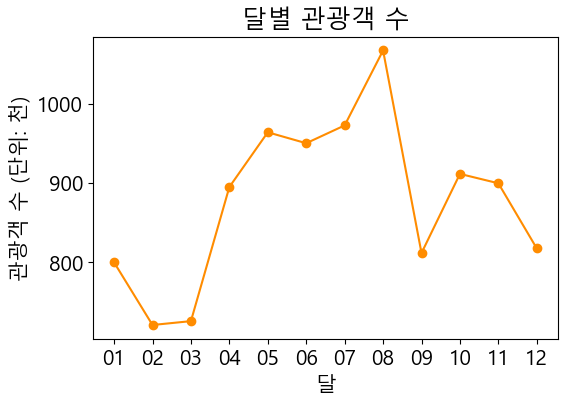

In [9]:
plt.figure(dpi=100)
plot = plt.plot(df_group2.index, df_group2['tour_cnt']/1000, marker='o', color='darkorange')
plt.title('달별 관광객 수')
plt.xlabel('달')
plt.ylabel('관광객 수 (단위: 천)')
plt.show()

- 제주도 관광객 수는 1분기(1월, 2월, 3월)에 적은 관광객 수를 보이며 7월과 8월에 높은 숫자를 보인다. 
- 겨울에 비해 여름에 많은 관광객 수가 오는 것으로 보인다. 
- 겨울에도 많은 행사를 한다면 1분기에도 많은 관광객들을 부를 수 있을 것 같다.

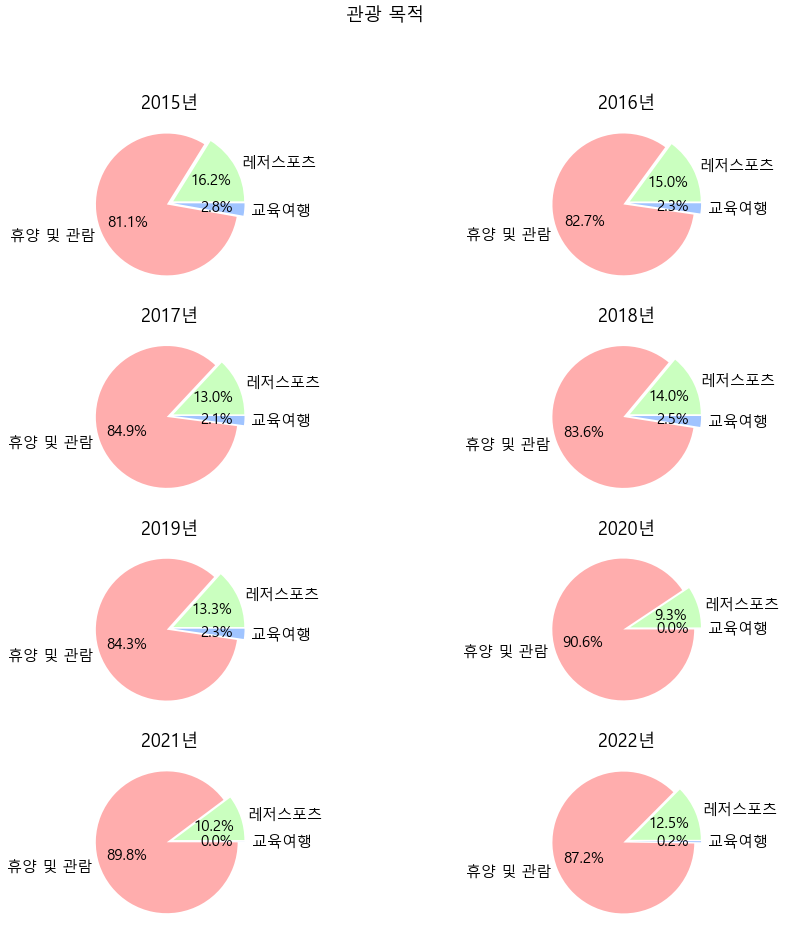

In [47]:
fig, axs = plt.subplots(4, 2, figsize = (15, 15))  
fig.suptitle('관광 목적')
values_2015 = [ df_group.loc['2015'].leis_sports_cnt
          , df_group.loc['2015'].ref_view_cnt
          , df_group.loc['2015'].edu_trip_cnt]
values_2016 = [ df_group.loc['2016'].leis_sports_cnt
          , df_group.loc['2016'].ref_view_cnt
          , df_group.loc['2016'].edu_trip_cnt]
values_2017 = [ df_group.loc['2017'].leis_sports_cnt
          , df_group.loc['2017'].ref_view_cnt
          , df_group.loc['2017'].edu_trip_cnt]
values_2018 = [ df_group.loc['2018'].leis_sports_cnt
          , df_group.loc['2018'].ref_view_cnt
          , df_group.loc['2018'].edu_trip_cnt]
values_2019 = [ df_group.loc['2019'].leis_sports_cnt
          , df_group.loc['2019'].ref_view_cnt
          , df_group.loc['2019'].edu_trip_cnt]
values_2020 = [ df_group.loc['2020'].leis_sports_cnt
          , df_group.loc['2020'].ref_view_cnt
          , df_group.loc['2020'].edu_trip_cnt]
values_2021 = [ df_group.loc['2021'].leis_sports_cnt
          , df_group.loc['2021'].ref_view_cnt
          , df_group.loc['2021'].edu_trip_cnt]
values_2022 = [ df_group.loc['2022'].leis_sports_cnt
          , df_group.loc['2022'].ref_view_cnt
          , df_group.loc['2022'].edu_trip_cnt]
labels = ['레저스포츠', '휴양 및 관람', '교육여행']
colors = ['#caffbf', '#ffadad', '#a0c4ff']
explode = [0.05] * 3
axs[0, 0].pie(values_2015, labels=labels, autopct='%.01f%%',  colors = colors, explode = explode)
axs[0, 0].set_title('2015년')

axs[0, 1].pie(values_2016, labels=labels, autopct='%.01f%%',  colors = colors, explode = explode)
axs[0, 1].set_title('2016년')

axs[1, 0].pie(values_2017, labels=labels, autopct='%.01f%%',  colors = colors, explode = explode)
axs[1, 0].set_title('2017년')

axs[1, 1].pie(values_2018, labels=labels, autopct='%.01f%%',  colors = colors, explode = explode)
axs[1, 1].set_title('2018년')

axs[2, 0].pie(values_2019, labels=labels, autopct='%.01f%%',  colors = colors, explode = explode)
axs[2, 0].set_title('2019년')

axs[2, 1].pie(values_2020, labels=labels, autopct='%.01f%%',  colors = colors, explode = explode)
axs[2, 1].set_title('2020년')

axs[3, 0].pie(values_2021, labels=labels, autopct='%.01f%%',  colors = colors, explode = explode)
axs[3, 0].set_title('2021년')

axs[3, 1].pie(values_2022, labels=labels, autopct='%.01f%%',  colors = colors, explode = explode)
axs[3, 1].set_title('2022년')

plt.show()